In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df= pd.read_csv(r"C:\Users\Faculdade\OneDrive - sga.pucminas.br\Área de Trabalho\projects\projeto-mineracao-de-dados\Data\Bases Modificadas\base_tratada_sem_nulos.csv")

In [21]:
df.dtypes

Unnamed: 0.1               int64
Unnamed: 0                 int64
Sexo                     float64
Apoio_Familiar           float64
Apoio_de_Amigos          float64
                          ...   
saneamento_basico          int64
moradia_vulneravel         int64
tempo_total_exercicio    float64
frequencia_exercicio     float64
freq_bebida_alcoolica    float64
Length: 64, dtype: object

In [22]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Sexo', 'Apoio_Familiar',
       'Apoio_de_Amigos', 'Tipo_de_Trabalho', 'Curso_Mais_Elevado',
       'Diagnostico_Depressao', 'A005010', 'Estado_de_Saude',
       'Pratica_Exercicio', 'Exercicio_Mais_Frequente',
       'Ultima_Consulta_Medica', 'Procura_Atendimento_Saude', 'Problemas_Sono',
       'Consumo_Arroz_Macarrao', 'Consumo_Batata', 'Consumo_Feijao',
       'Consumo_Carne', 'Consumo_Ovo', 'Consumo_Verduras_1',
       'Consumo_Verduras_2', 'Consumo_Verduras_3', 'Consumo_Frutas_1',
       'Consumo_Frutas_2', 'Consumo_Leite', 'Consumo_Castanhas',
       'Consumo_Refrigerante', 'Consumo_Suco_Caixinha',
       'Consumo_Bebida_Achocolatada', 'Consumo_Salgadinho_Biscoito',
       'Consumo_Biscoito_Doce', 'Consumo_Sobremesa', 'Consumo_Embutidos',
       'Consumo_Pao', 'Consumo_Molhos_Industrializados',
       'Consumo_Alimentos_Prontos', 'Freq_Consumo_Feijao',
       'Freq_Consumo_Verduras', 'Tipo_Verdura_Costuma_Comer',
       'Freq_Consumo_Carne_V

In [23]:
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'renda_total', 'idade', 'peso_consolidado', 'altura_consolidada',  'tempo_total_exercicio', 'horas_trabalhadas_total'], inplace=True)

In [17]:
df.columns

Index(['Sexo', 'Apoio_Familiar', 'Apoio_de_Amigos', 'Tipo_de_Trabalho',
       'Curso_Mais_Elevado', 'Diagnostico_Depressao', 'A005010',
       'Estado_de_Saude', 'Pratica_Exercicio', 'Exercicio_Mais_Frequente',
       'Ultima_Consulta_Medica', 'Procura_Atendimento_Saude', 'Problemas_Sono',
       'Consumo_Arroz_Macarrao', 'Consumo_Batata', 'Consumo_Feijao',
       'Consumo_Carne', 'Consumo_Ovo', 'Consumo_Verduras_1',
       'Consumo_Verduras_2', 'Consumo_Verduras_3', 'Consumo_Frutas_1',
       'Consumo_Frutas_2', 'Consumo_Leite', 'Consumo_Castanhas',
       'Consumo_Refrigerante', 'Consumo_Suco_Caixinha',
       'Consumo_Bebida_Achocolatada', 'Consumo_Salgadinho_Biscoito',
       'Consumo_Biscoito_Doce', 'Consumo_Sobremesa', 'Consumo_Embutidos',
       'Consumo_Pao', 'Consumo_Molhos_Industrializados',
       'Consumo_Alimentos_Prontos', 'Freq_Consumo_Feijao',
       'Freq_Consumo_Verduras', 'Tipo_Verdura_Costuma_Comer',
       'Freq_Consumo_Carne_Vermelha', 'Freq_Consumo_Frango',
    

In [25]:
df.value_counts()

Sexo  Apoio_Familiar  Apoio_de_Amigos  Tipo_de_Trabalho  Curso_Mais_Elevado  Diagnostico_Depressao  A005010  Estado_de_Saude  Pratica_Exercicio  Exercicio_Mais_Frequente  Ultima_Consulta_Medica  Procura_Atendimento_Saude  Problemas_Sono  Consumo_Arroz_Macarrao  Consumo_Batata  Consumo_Feijao  Consumo_Carne  Consumo_Ovo  Consumo_Verduras_1  Consumo_Verduras_2  Consumo_Verduras_3  Consumo_Frutas_1  Consumo_Frutas_2  Consumo_Leite  Consumo_Castanhas  Consumo_Refrigerante  Consumo_Suco_Caixinha  Consumo_Bebida_Achocolatada  Consumo_Salgadinho_Biscoito  Consumo_Biscoito_Doce  Consumo_Sobremesa  Consumo_Embutidos  Consumo_Pao  Consumo_Molhos_Industrializados  Consumo_Alimentos_Prontos  Freq_Consumo_Feijao  Freq_Consumo_Verduras  Tipo_Verdura_Costuma_Comer  Freq_Consumo_Carne_Vermelha  Freq_Consumo_Frango  Freq_Consumo_Peixe  Freq_Consumo_Suco_Caixinha  Freq_Consumo_Suco_Natural  Freq_Consumo_Frutas  Freq_Comer_Frutas_Dia  Freq_Consumo_Refrigerante  Freq_Consumo_Leite  Tipo_Leite  Freq_Consum

In [26]:
df = df.astype('category')

In [33]:
classe = 'Diagnostico_Depressao'  
entropia_baseado_na_classe = {}

# Iterar sobre todas as colunas do DataFrame
for column in df.columns:
    if column != classe:
        unique_classes = df[classe].unique()
        total_entropia = 0
        for value in unique_classes:
            subset = df[df[classe] == value][column]
            total_entropia += len(subset) / len(df) * calcula_entropia(subset)
        entropia_baseado_na_classe[column] = total_entropia

print("\nEntropia de cada atributo em relação à classe:")
# Imprimir as entropias de todas as colunas, mesmo que haja muitas
for column, entropia in entropia_baseado_na_classe.items():
    print(f"{column}: {entropia}")



Entropia de cada atributo em relação à classe:
Sexo: 0.9750464384429841
Apoio_Familiar: 0.7006139387476383
Apoio_de_Amigos: 0.8989030338612245
Tipo_de_Trabalho: 0.7673842926810199
Curso_Mais_Elevado: 0.6766079482553459
A005010: 0.47542336561392207
Estado_de_Saude: 0.6810669881755118
Pratica_Exercicio: 0.9442823076470568
Exercicio_Mais_Frequente: 0.45422552912663944
Ultima_Consulta_Medica: 0.4419700673928943
Procura_Atendimento_Saude: 0.7605022573374819
Problemas_Sono: 0.7456827047971407
Consumo_Arroz_Macarrao: 0.46086676246781916
Consumo_Batata: 0.9722213830859208
Consumo_Feijao: 0.7478641852002679
Consumo_Carne: 0.4262684345340236
Consumo_Ovo: 0.9745525811817346
Consumo_Verduras_1: 0.9986050937284516
Consumo_Verduras_2: 0.9659019704395119
Consumo_Verduras_3: 0.9719580269432749
Consumo_Frutas_1: 0.9248908549302097
Consumo_Frutas_2: 0.9631847403846884
Consumo_Leite: 0.9917028946870711
Consumo_Castanhas: 0.5617128704366429
Consumo_Refrigerante: 0.821282453448795
Consumo_Suco_Caixinha: 0

In [32]:
# Entropia por atributo 
def calcula_entropia(column):
    
    column = column.astype('object')
    
    column_without_nan = column[~column.isna()]
    
    values, counts = np.unique(column_without_nan, return_counts=True)
    
    probabilities = counts / len(column_without_nan)
    
    entropia = -np.sum(probabilities * np.log2(probabilities + 1e-10))
    
    if len(values) > 0:
        return entropia / np.log2(len(values))
    else:
        return 0

entropias = {}
for column in df.columns:
    entropias[column] = calcula_entropia(df[column])

print("Entropia de cada atributo:")
sorted_entropias = sorted(entropia_baseado_na_classe.items(), key=lambda x: x[1], reverse=True)
for column, entropia in sorted_entropias:
     print(f"{column}: {entropia:.4f}")

Entropia de cada atributo:
Consumo_Verduras_1: 0.9986
Consumo_Leite: 0.9917
Sexo: 0.9750
Consumo_Ovo: 0.9746
Consumo_Batata: 0.9722
Consumo_Verduras_3: 0.9720
trabalhou: 0.9692
Consumo_Verduras_2: 0.9659
Consumo_Molhos_Industrializados: 0.9655
Consumo_Frutas_2: 0.9632
Pratica_Exercicio: 0.9443
Freq_Consumo_Carne_Vermelha: 0.9431
Consumo_Frutas_1: 0.9249
Freq_Consumo_Suco_Natural: 0.9148
Freq_Consumo_Frutas: 0.9030
Freq_Consumo_Frango: 0.9001
Apoio_de_Amigos: 0.8989
doencas_cronicas: 0.8844
Freq_Consumo_Verduras: 0.8567
Consumo_Pao: 0.8425
freq_bebida_alcoolica: 0.8278
Consumo_Refrigerante: 0.8213
Freq_Consumo_Leite: 0.7791
Freq_Consumo_Feijao: 0.7682
Tipo_de_Trabalho: 0.7674
Consumo_Embutidos: 0.7638
Procura_Atendimento_Saude: 0.7605
Tipo_Leite: 0.7548
Consumo_Feijao: 0.7479
Problemas_Sono: 0.7457
Consumo_Salgadinho_Biscoito: 0.7243
Freq_Consumo_Doces: 0.7166
Freq_Consumo_Peixe: 0.7071
Consumo_Suco_Caixinha: 0.7018
Apoio_Familiar: 0.7006
Freq_Comer_Frutas_Dia: 0.6978
Consumo_Biscoito_D

In [34]:
# Criar um DataFrame a partir do dicionário de entropias
entropias_df = pd.DataFrame.from_dict(entropia_baseado_na_classe, orient='index', columns=['Entropia'])

# Resetar o índice para que as colunas tenham nomes adequados
entropias_df.reset_index(inplace=True)
entropias_df.rename(columns={'index': 'Atributo'}, inplace=True)

# Exportar o DataFrame para um arquivo CSV
entropias_df.to_csv('entropias_por_atributo.csv', index=False)

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


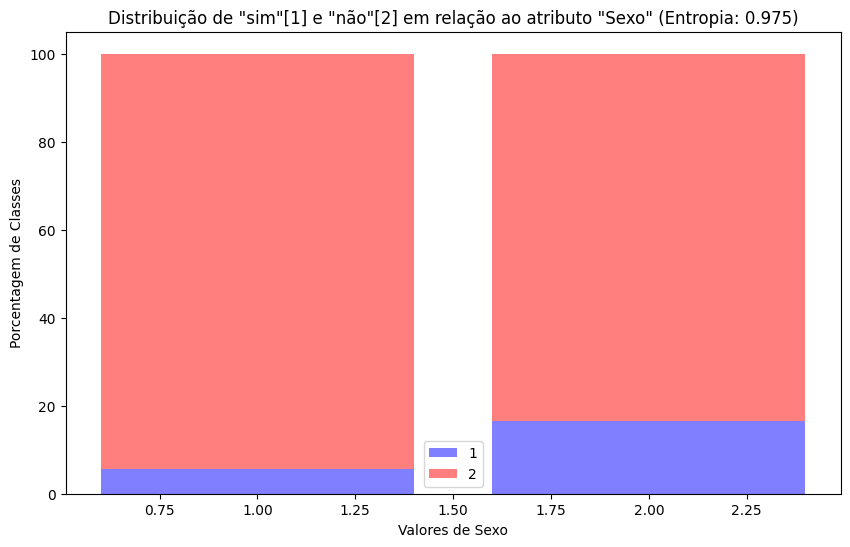

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


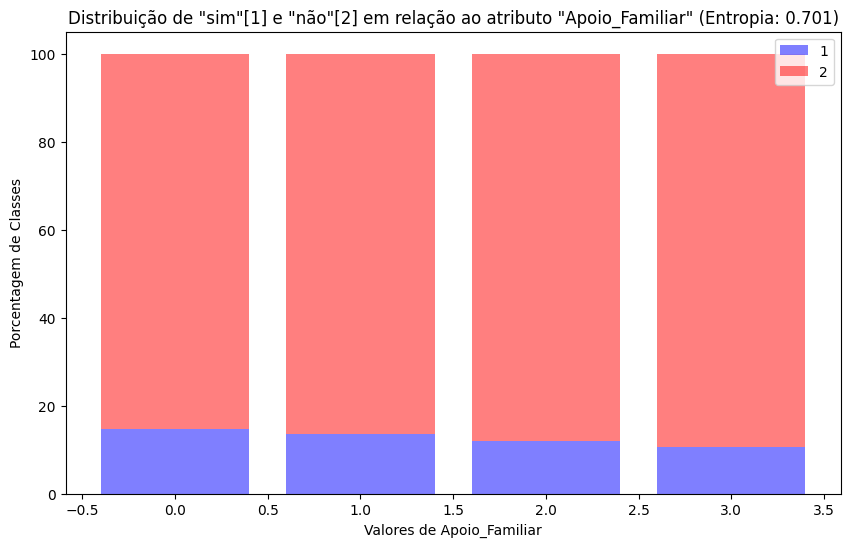

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


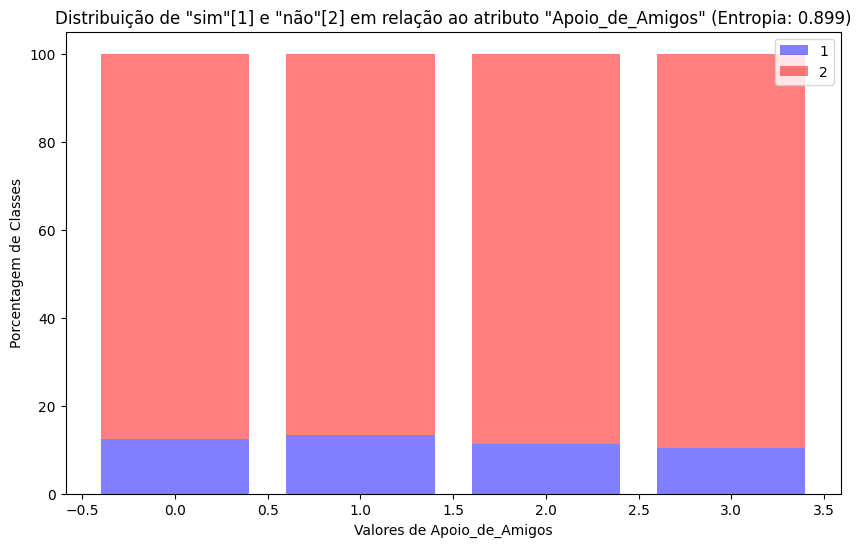

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


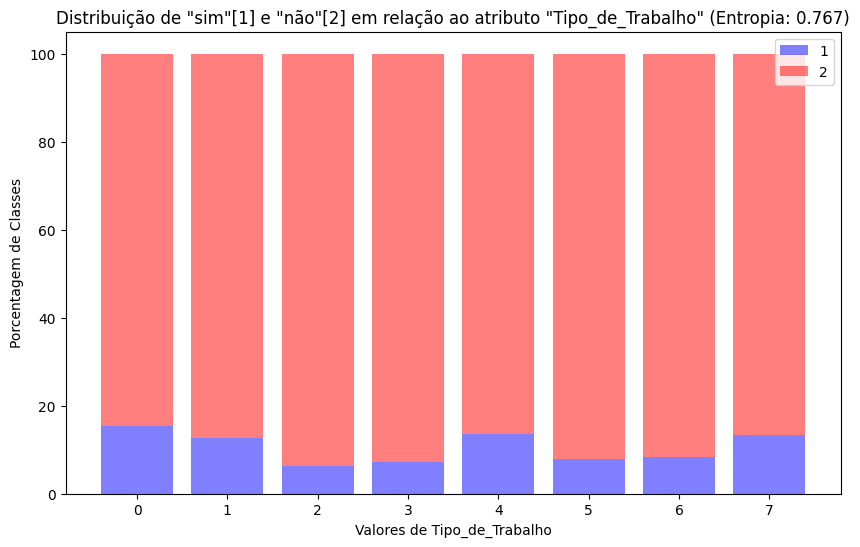

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


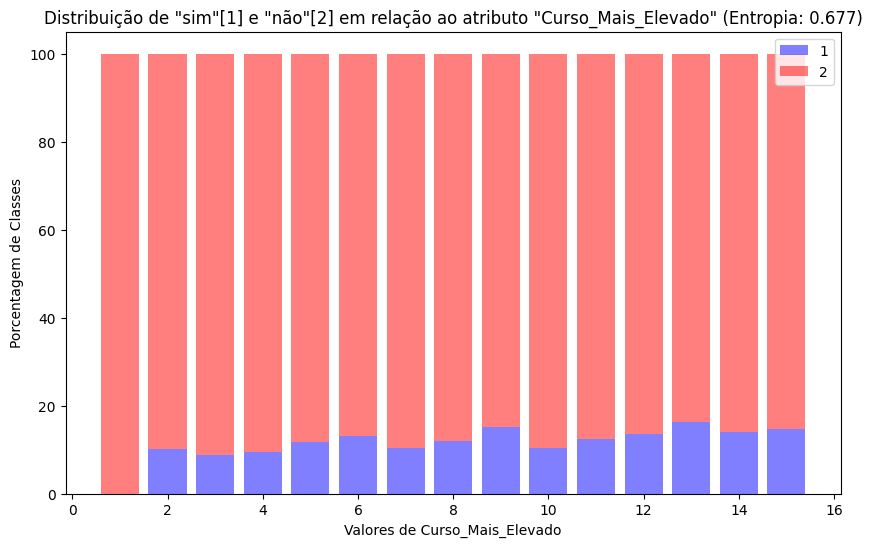

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


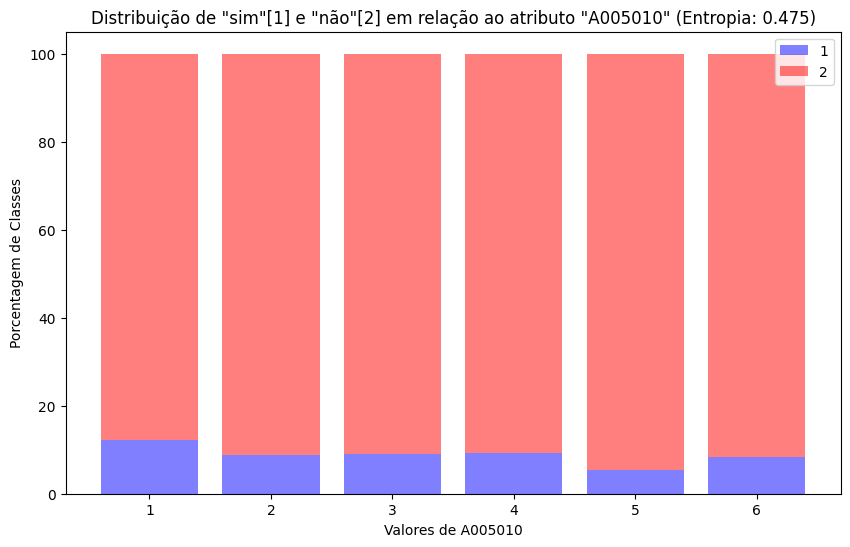

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


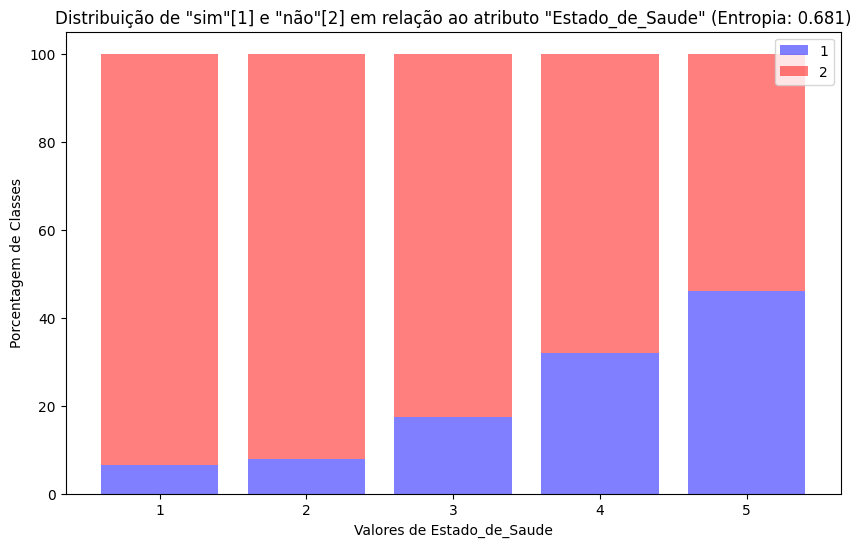

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


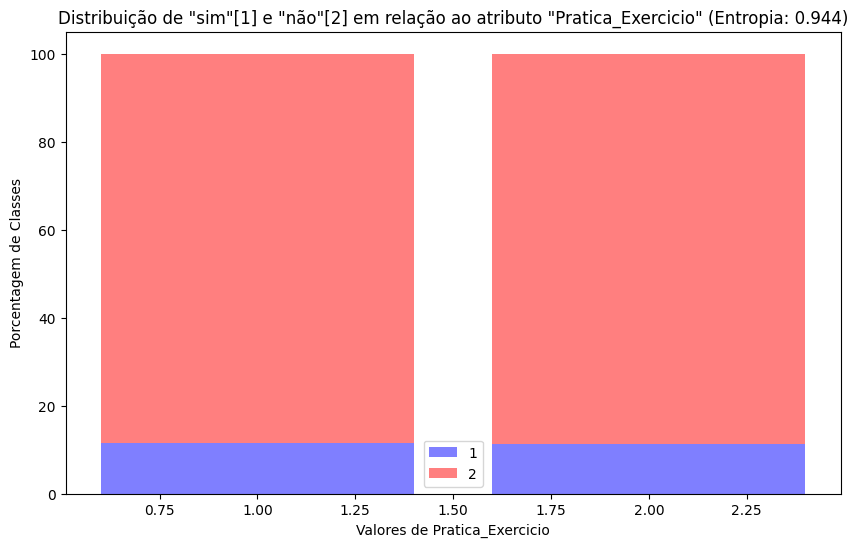

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


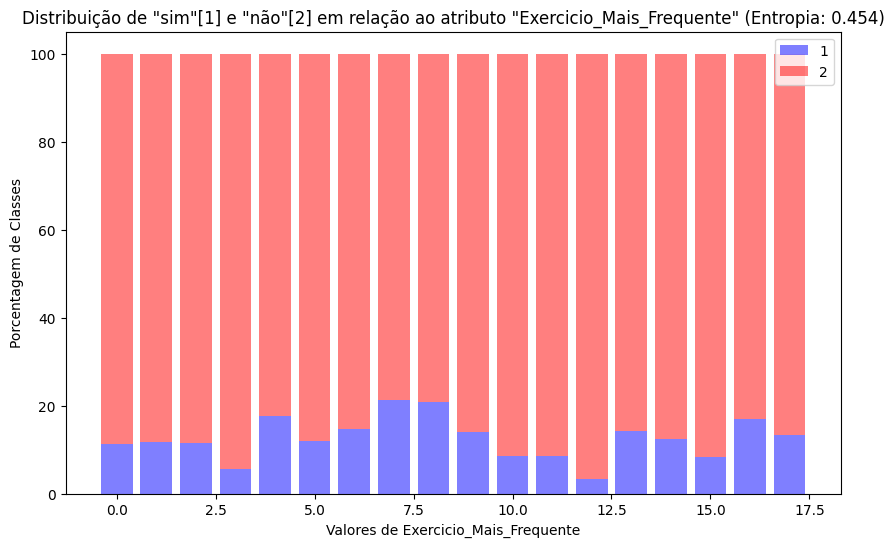

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


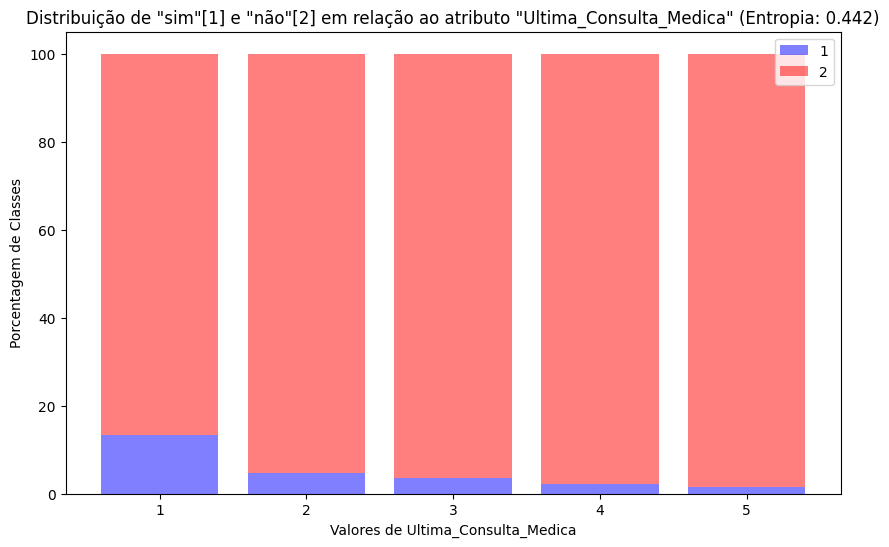

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


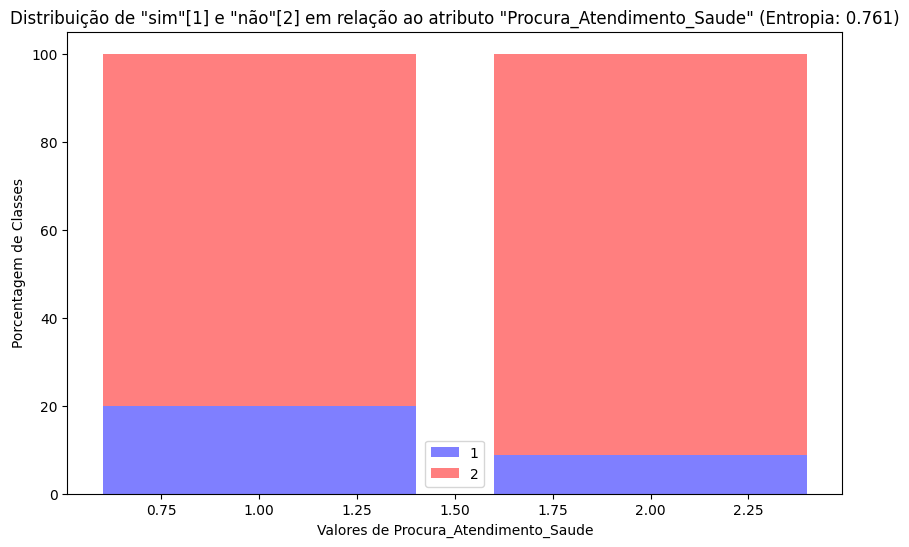

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


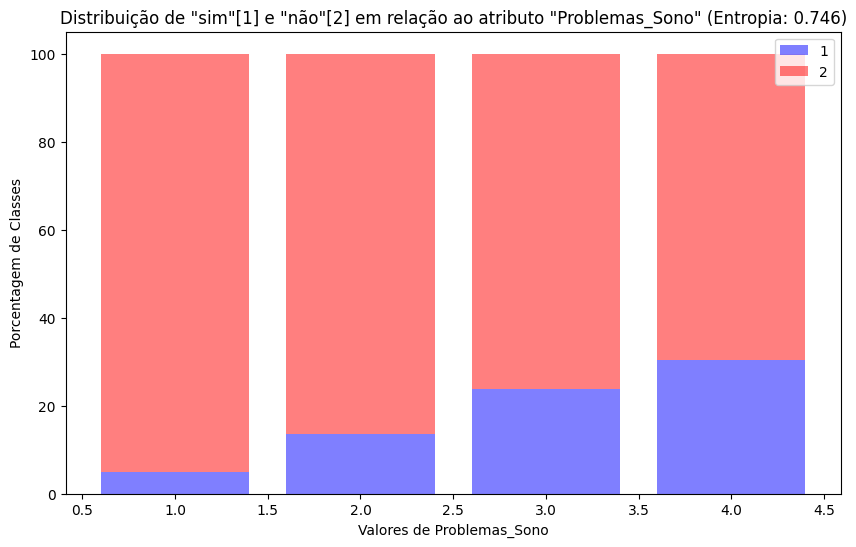

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


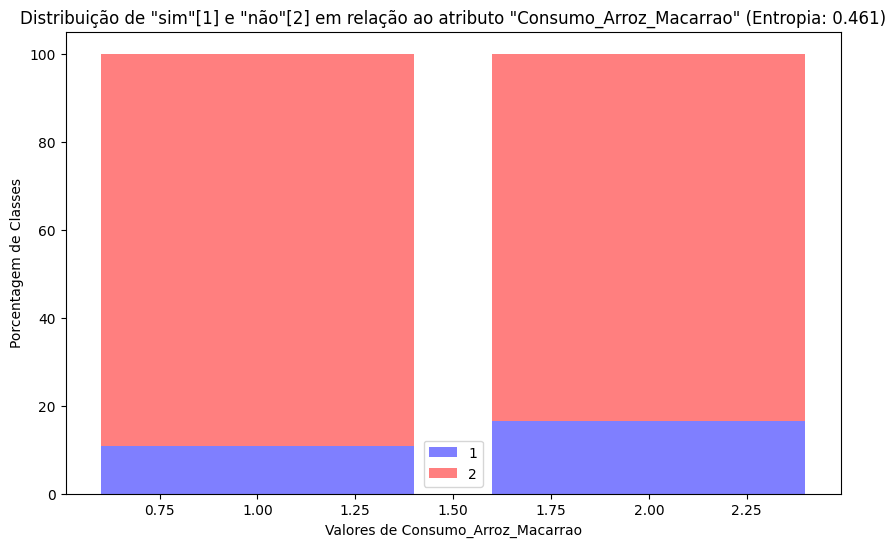

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


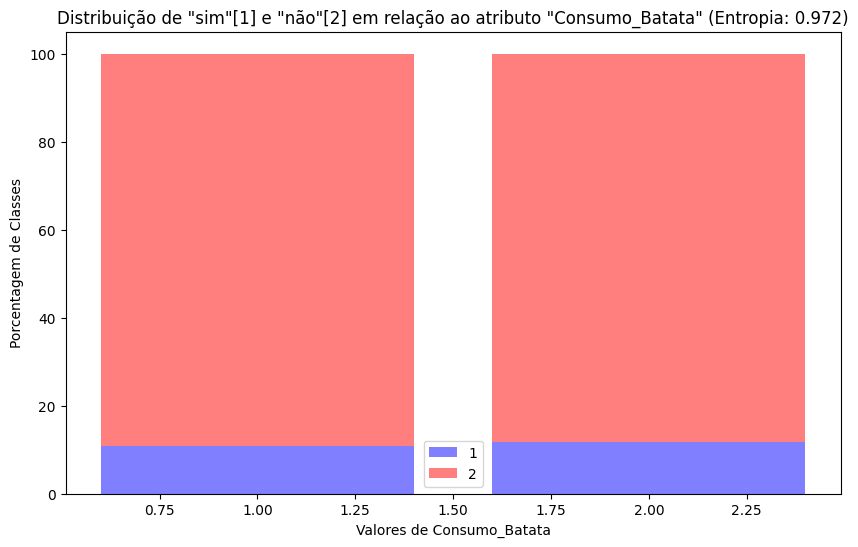

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


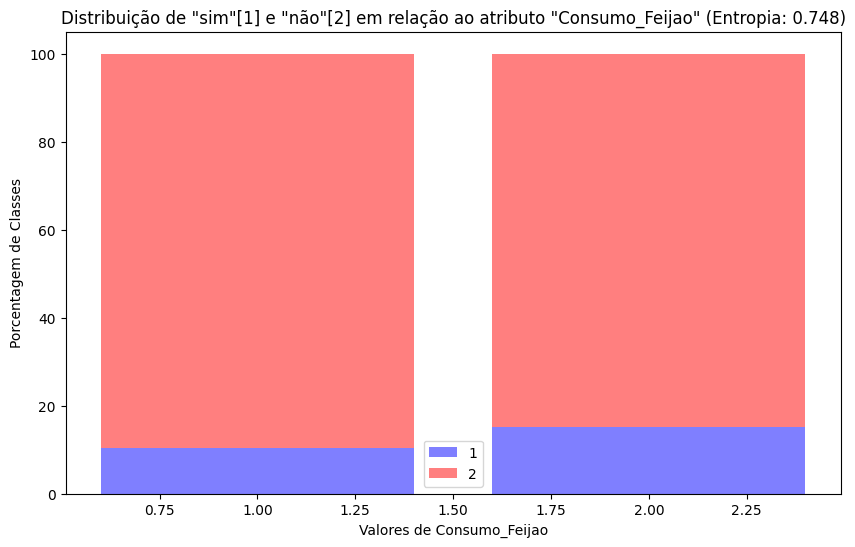

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


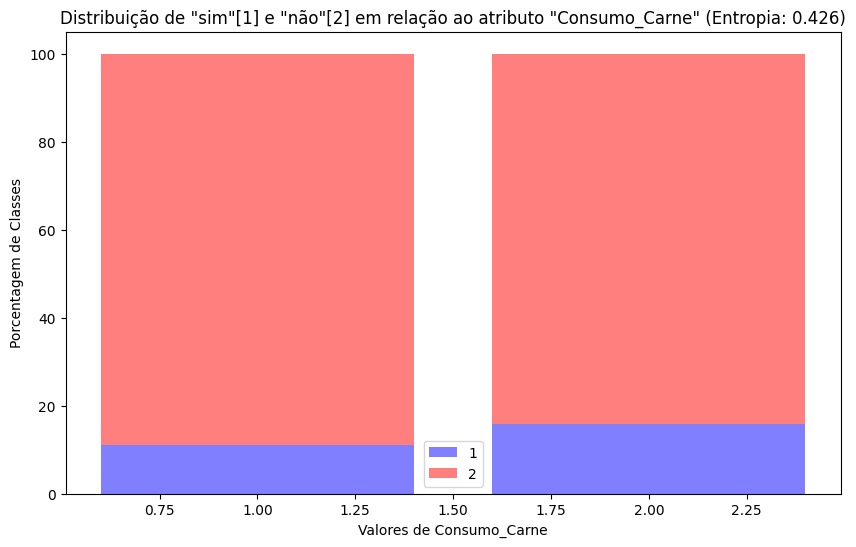

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


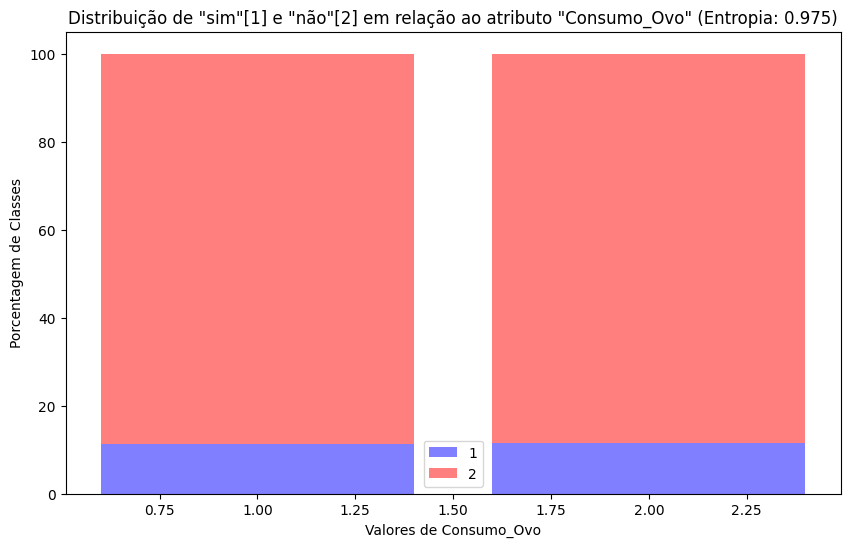

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


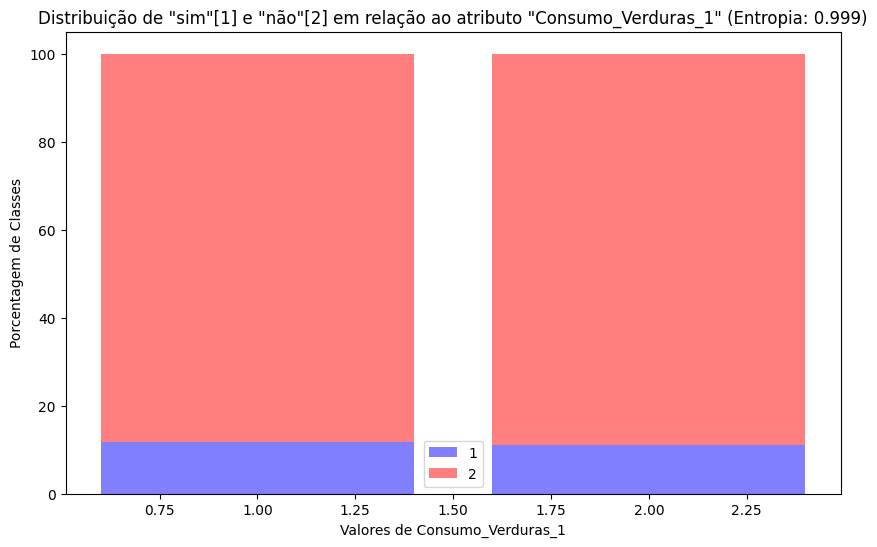

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


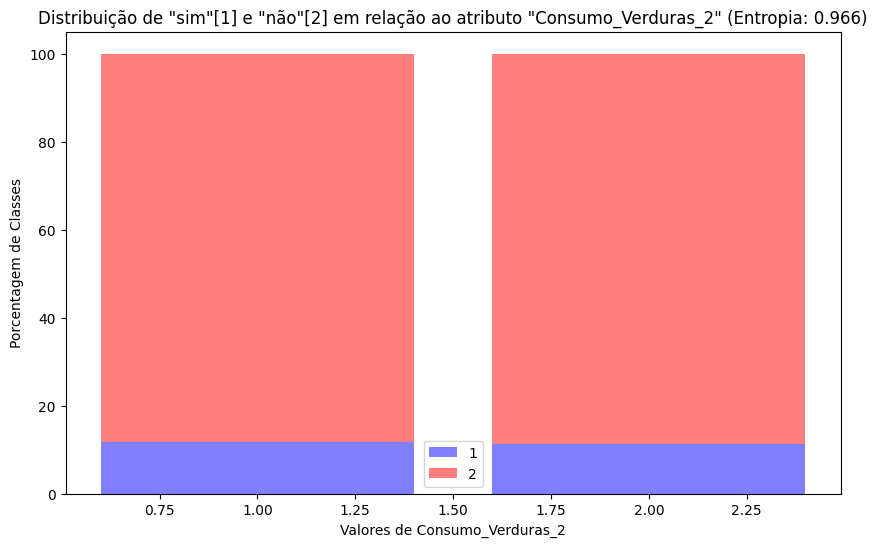

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


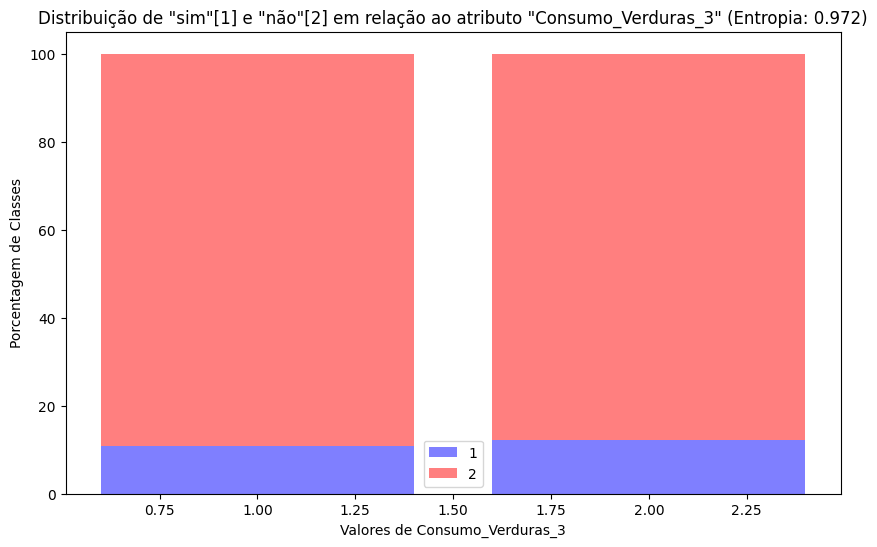

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


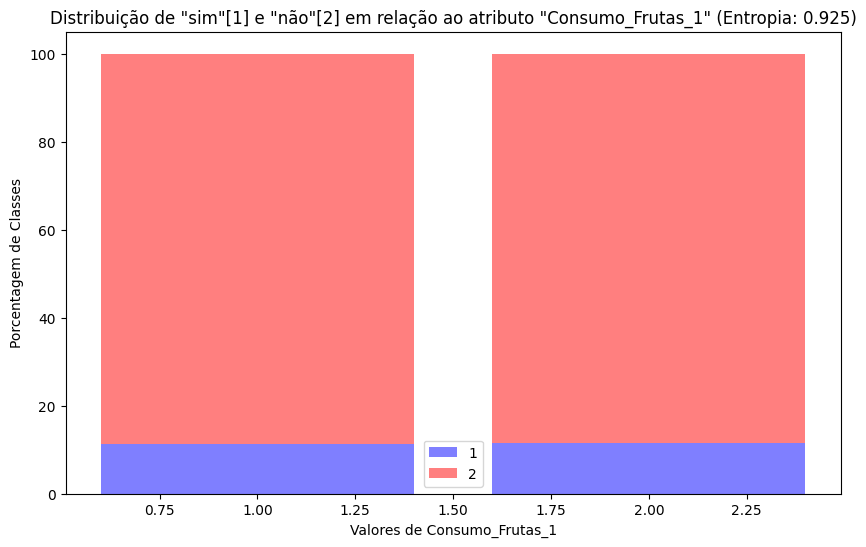

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


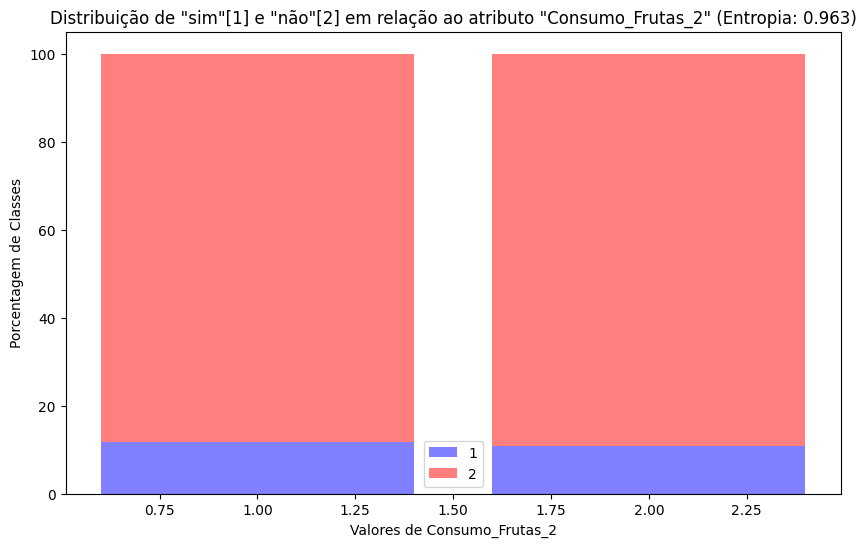

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


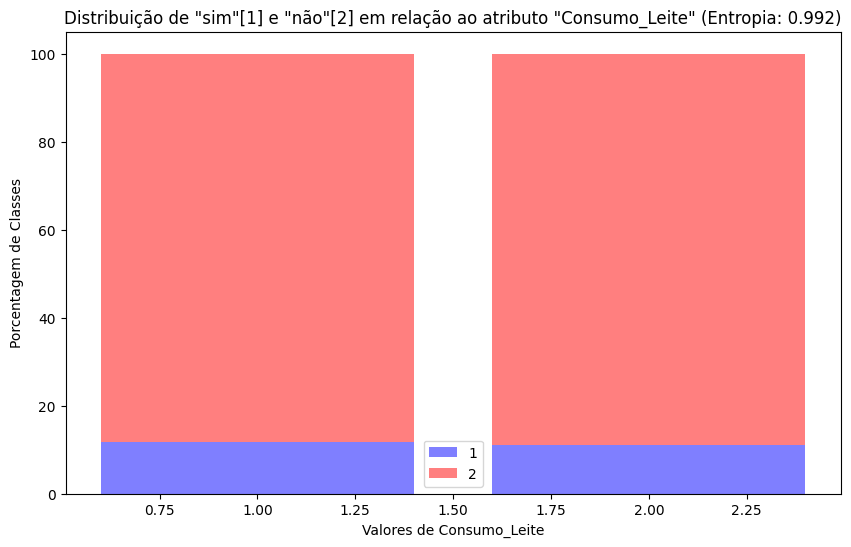

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


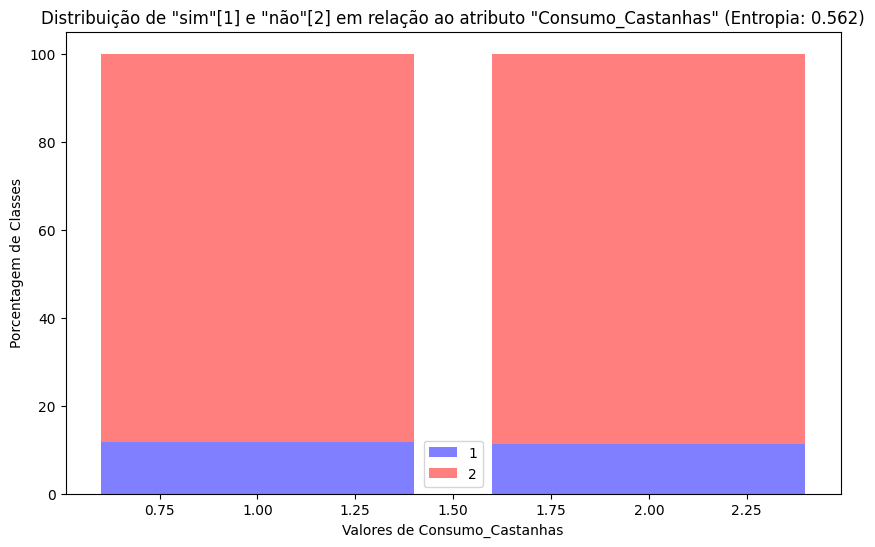

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


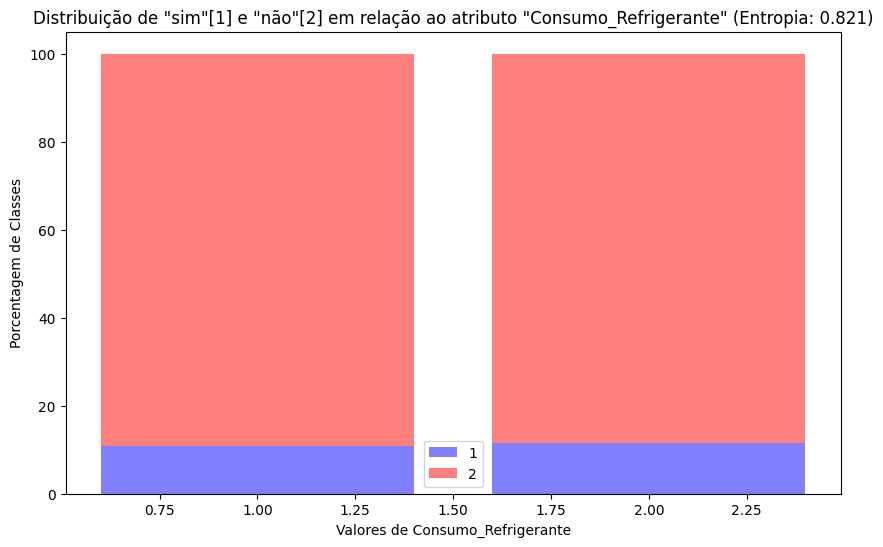

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


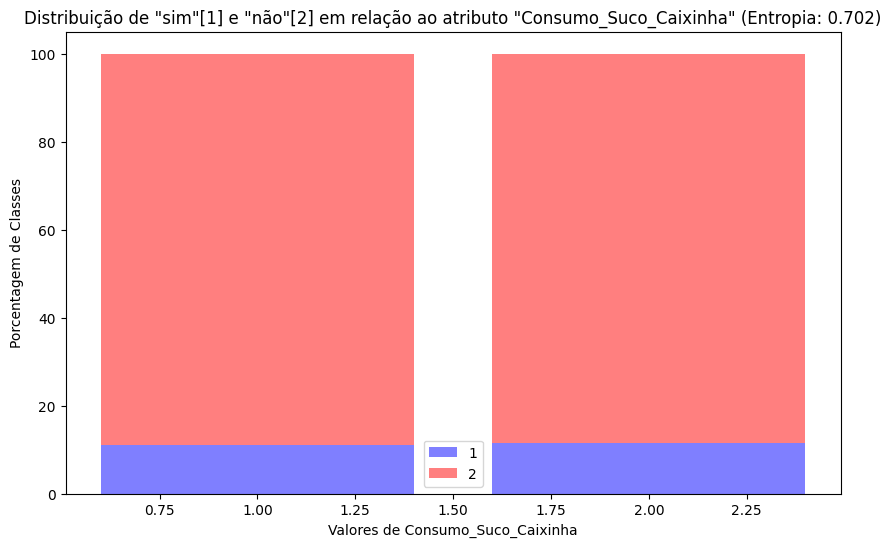

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


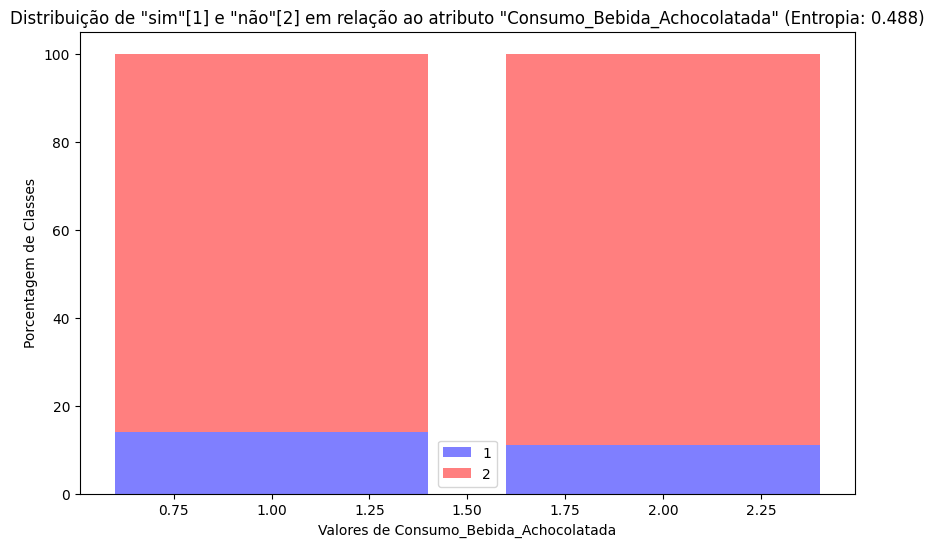

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


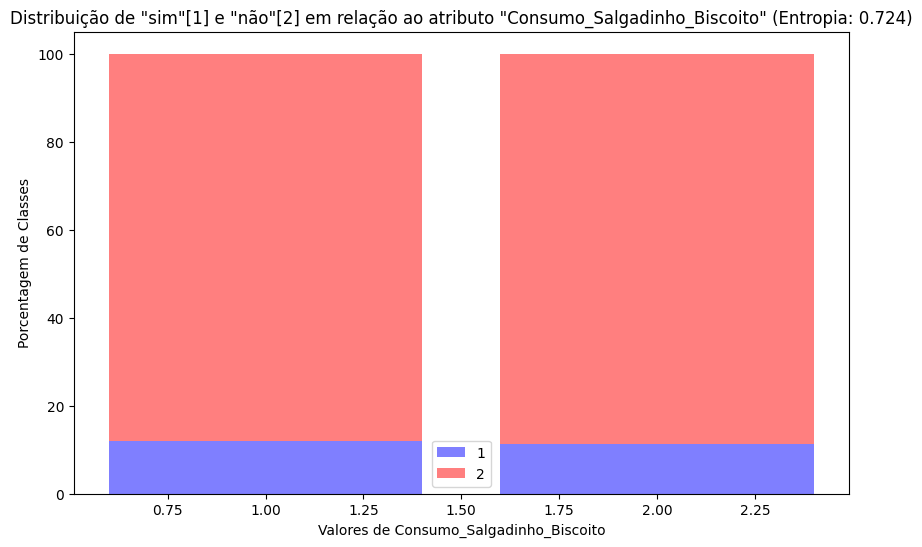

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


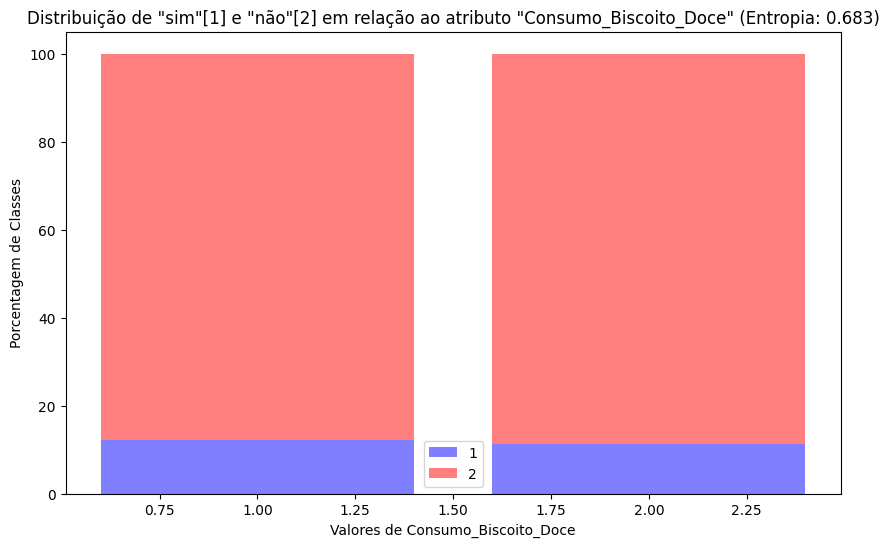

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


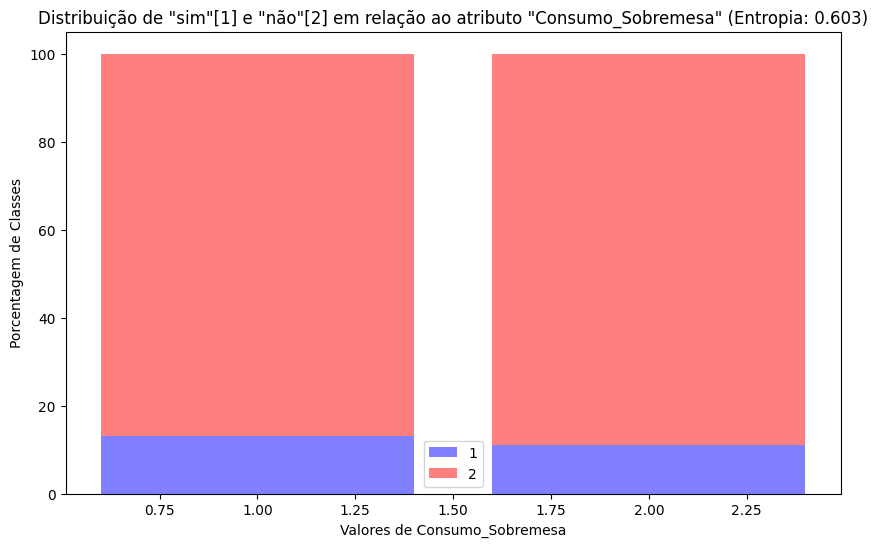

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


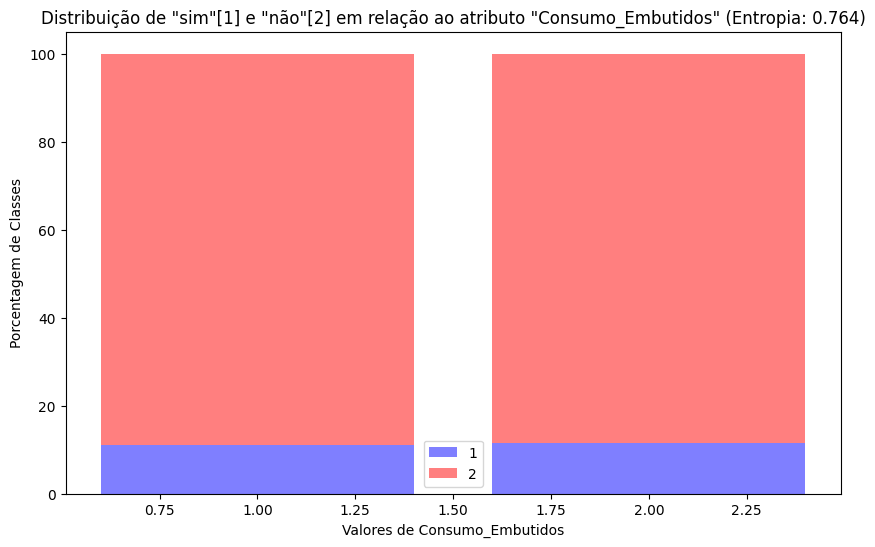

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


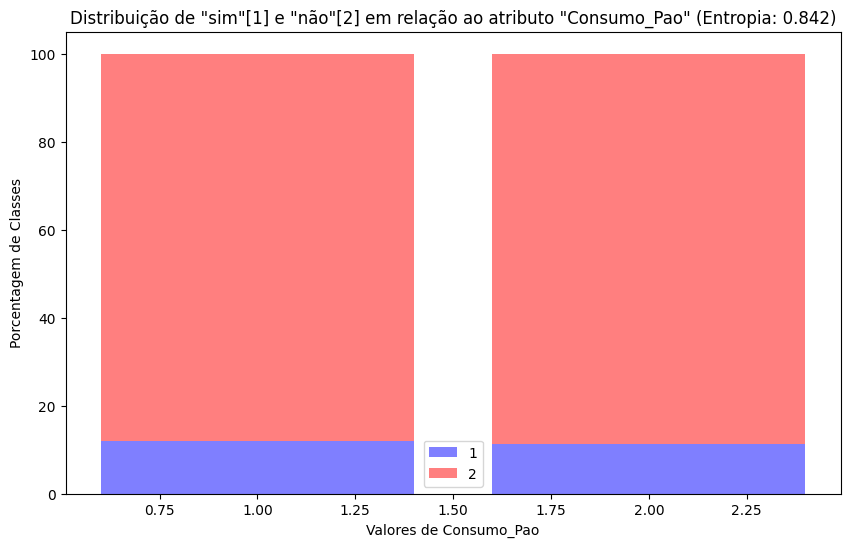

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


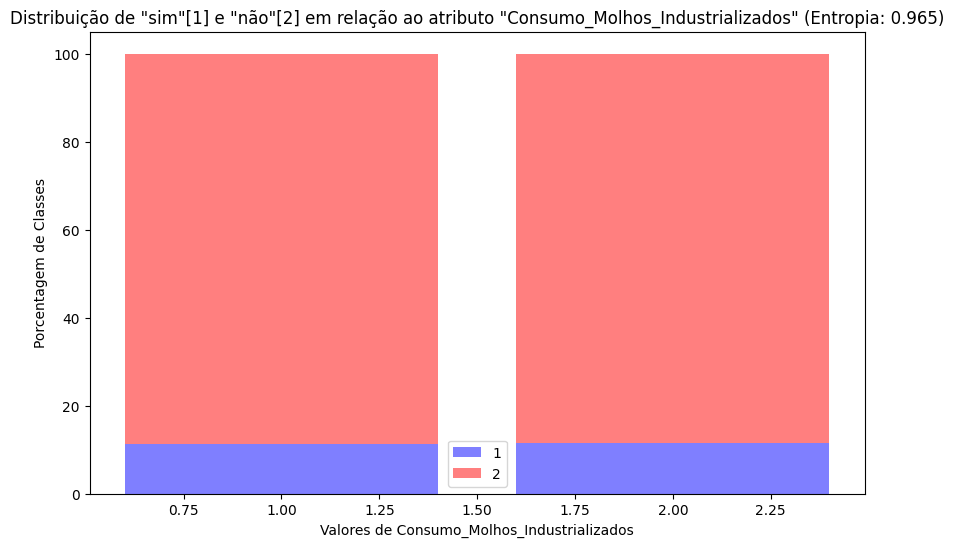

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


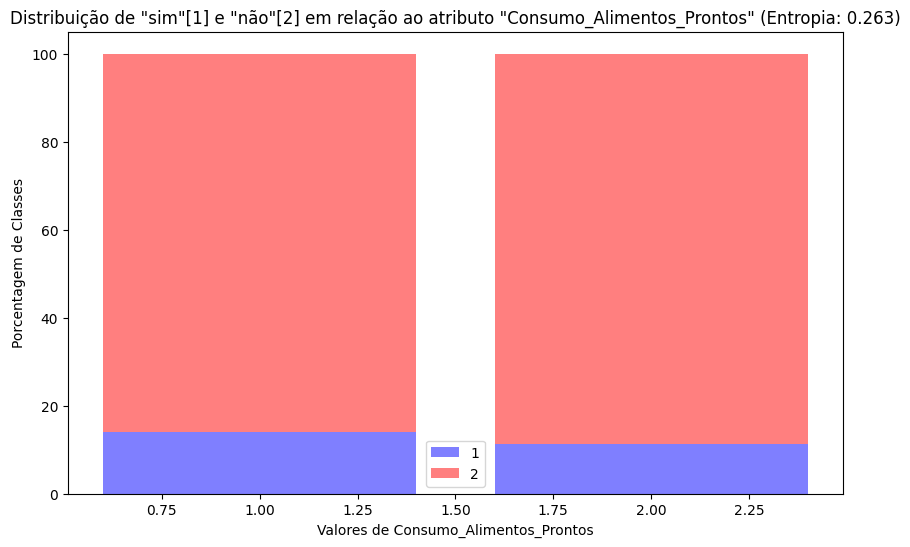

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


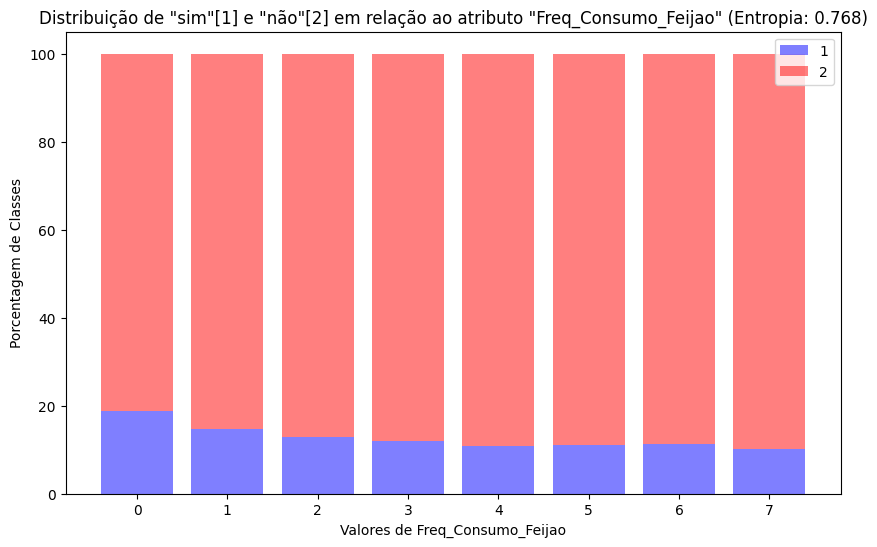

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


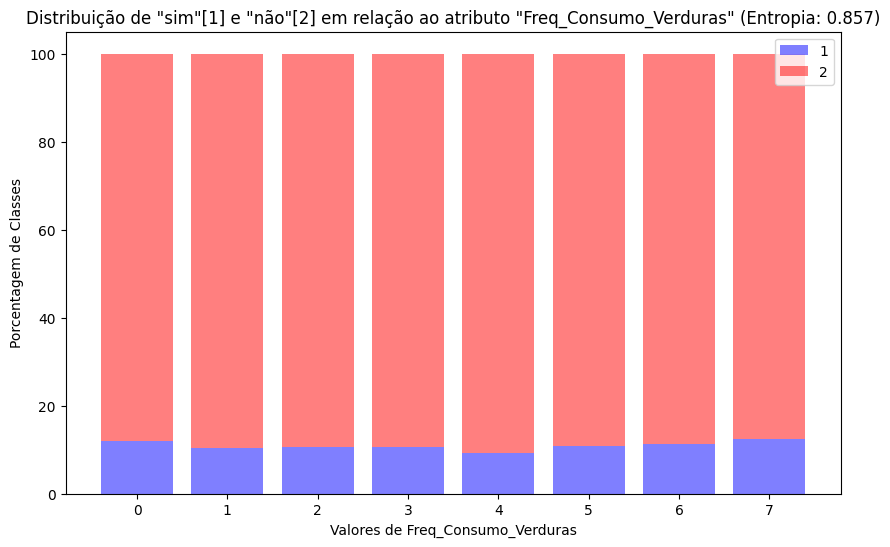

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


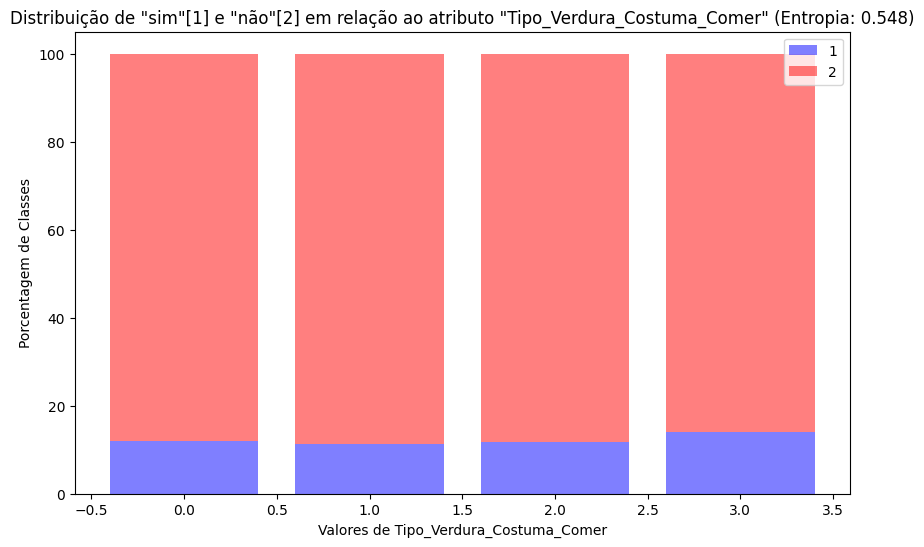

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


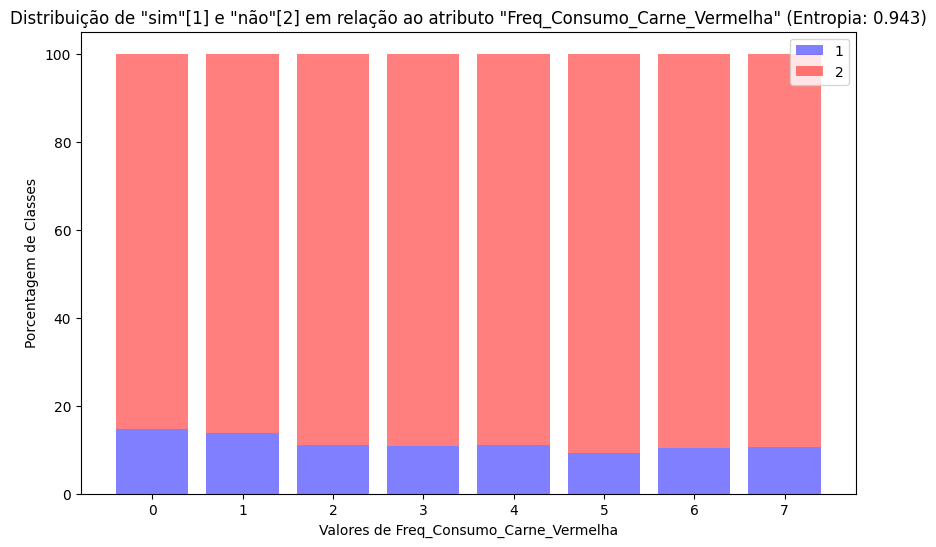

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


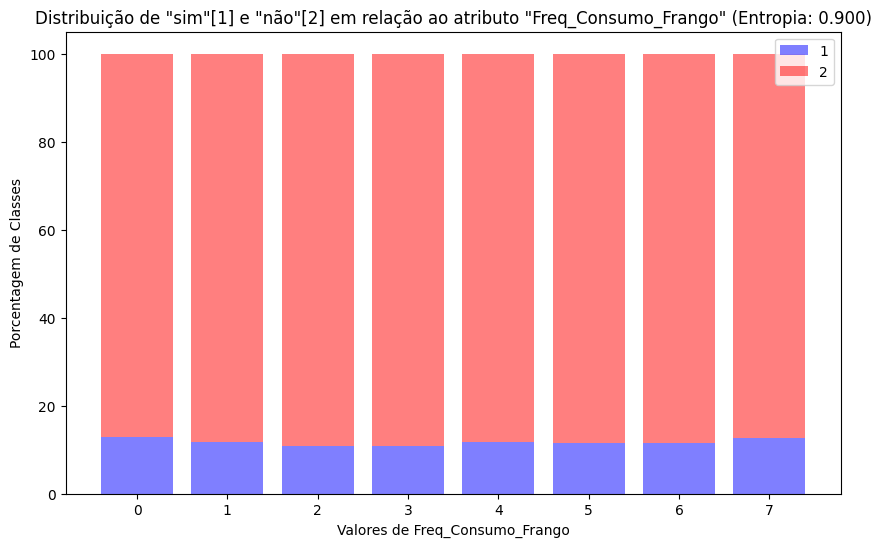

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


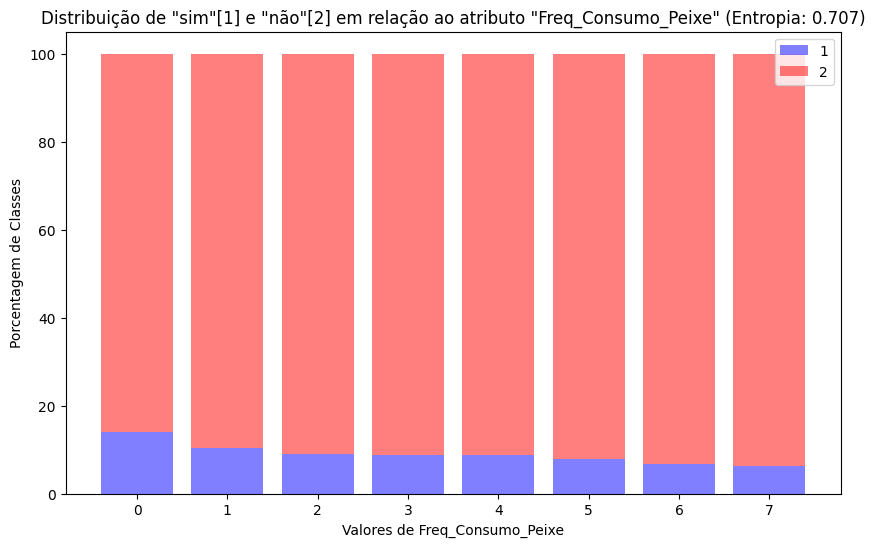

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


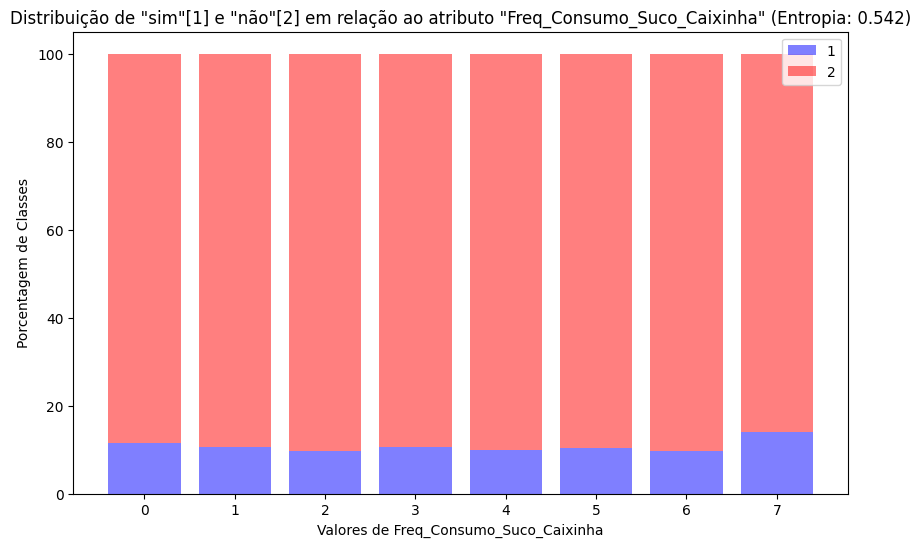

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


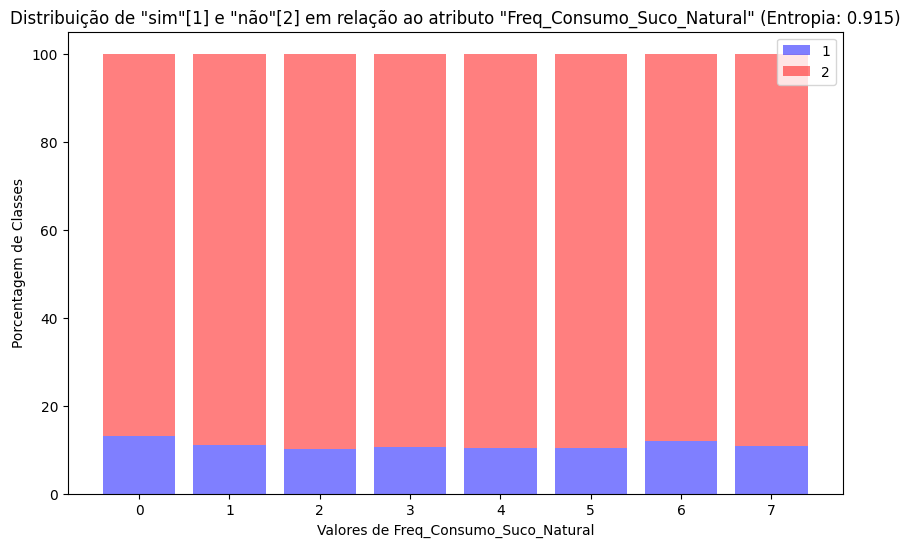

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


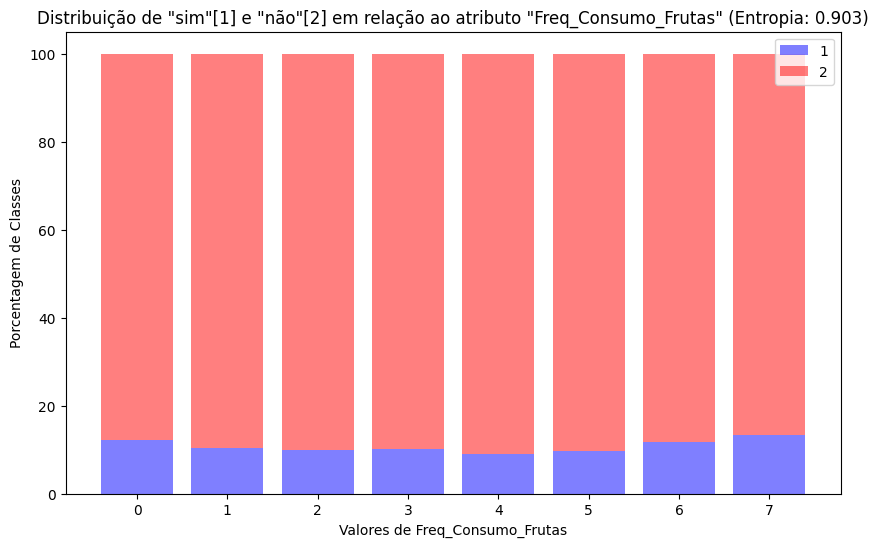

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


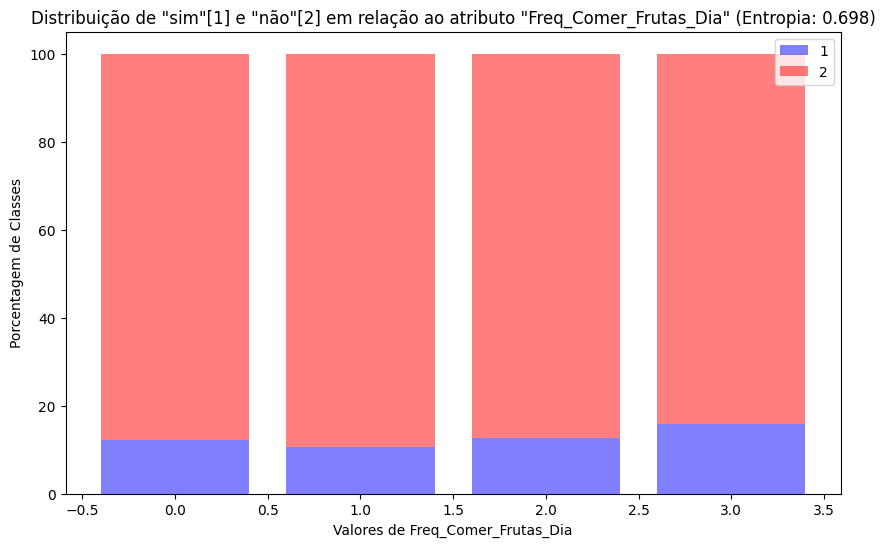

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


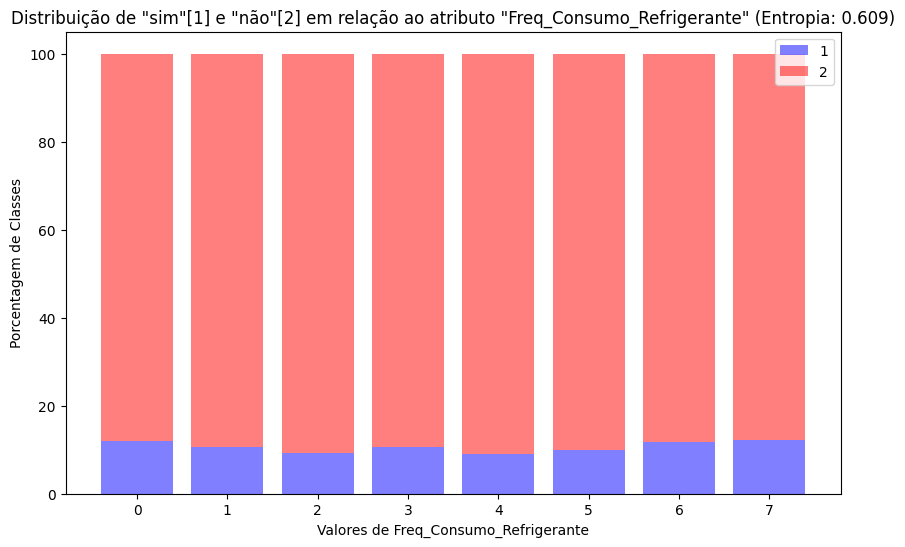

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


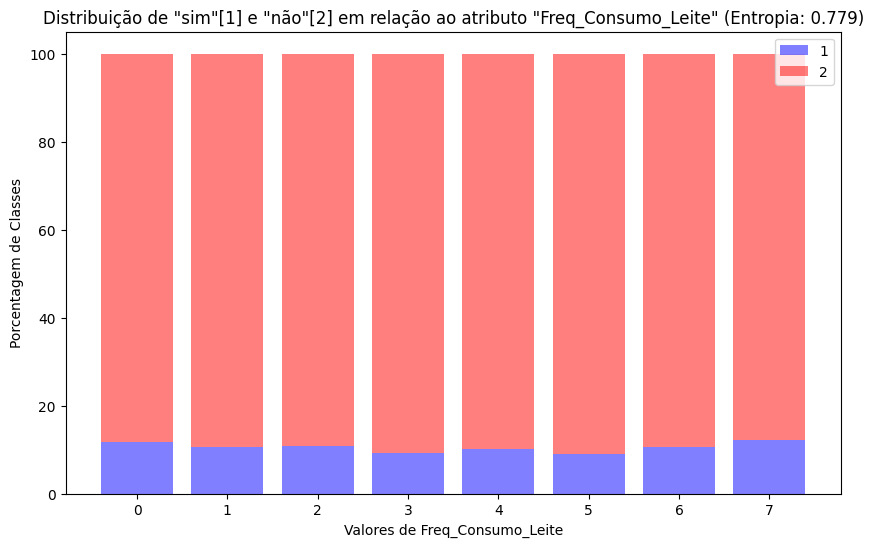

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


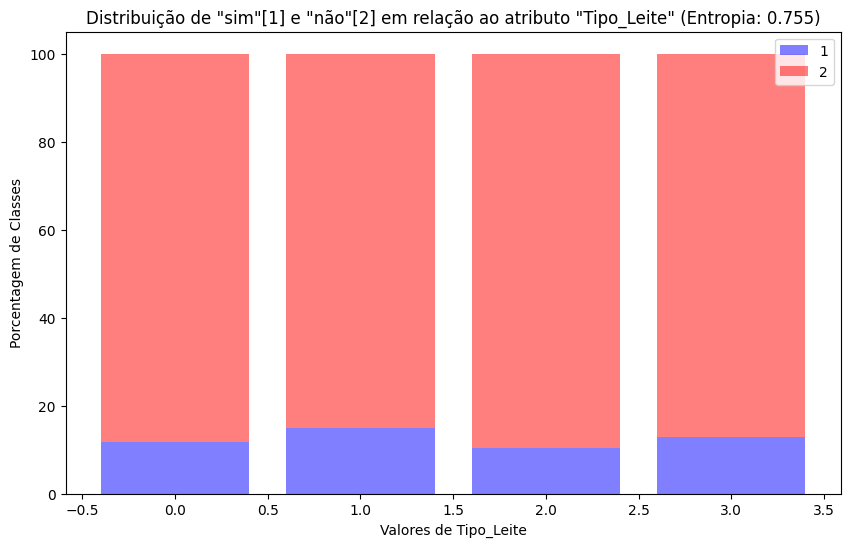

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


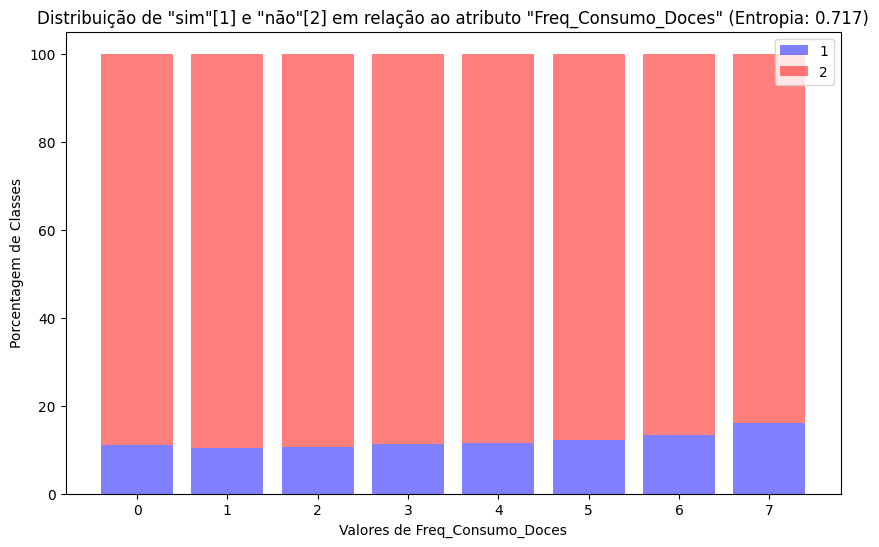

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


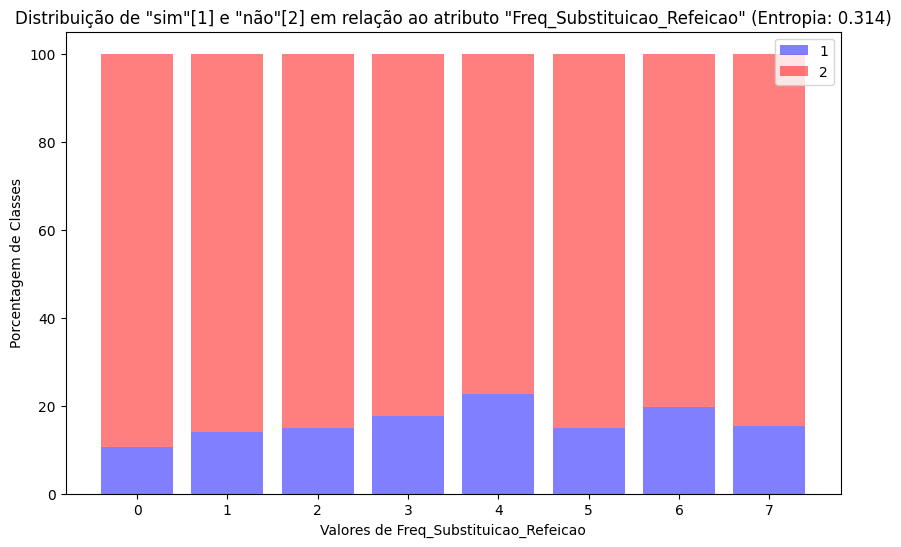

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


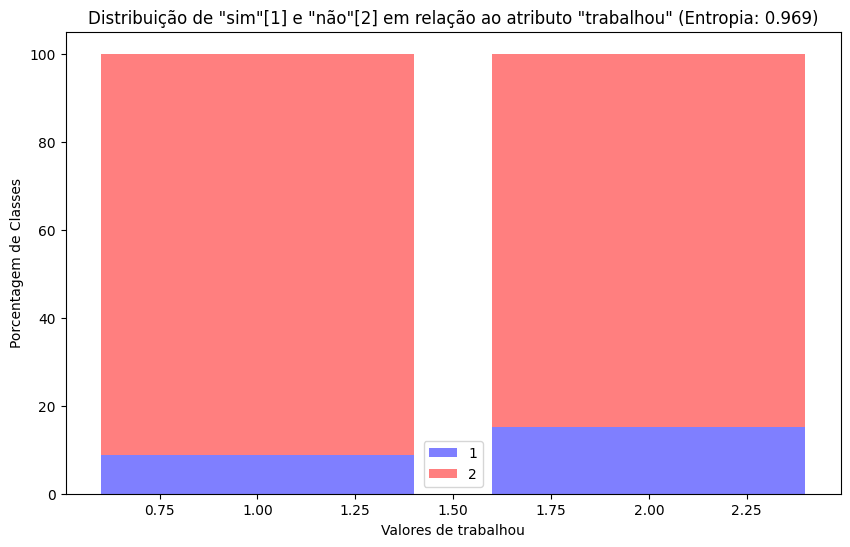

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


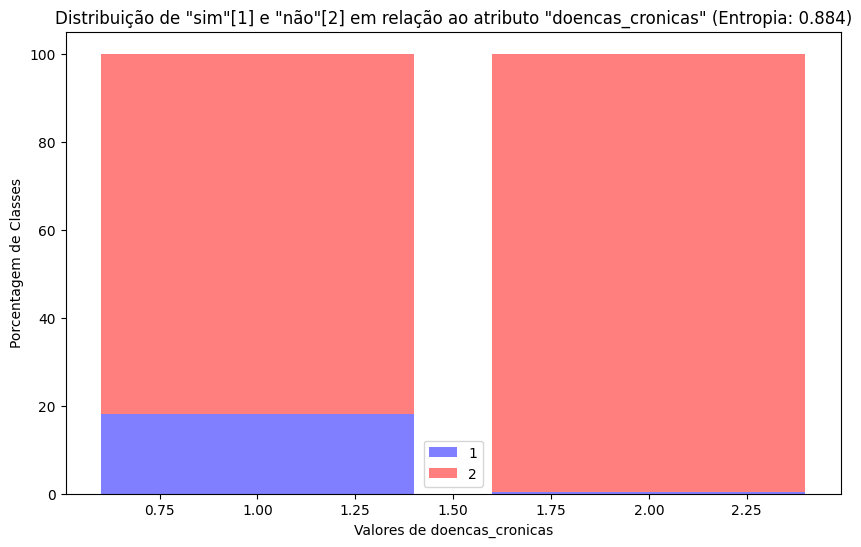

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


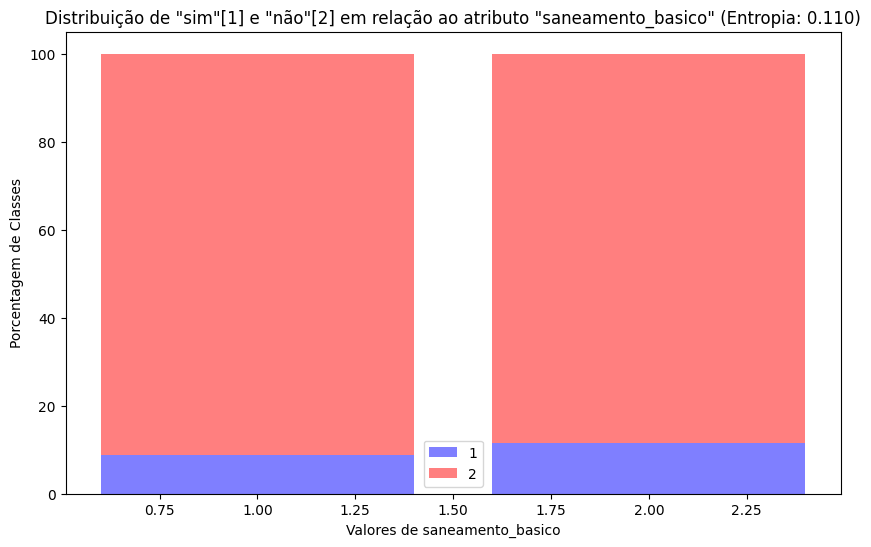

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


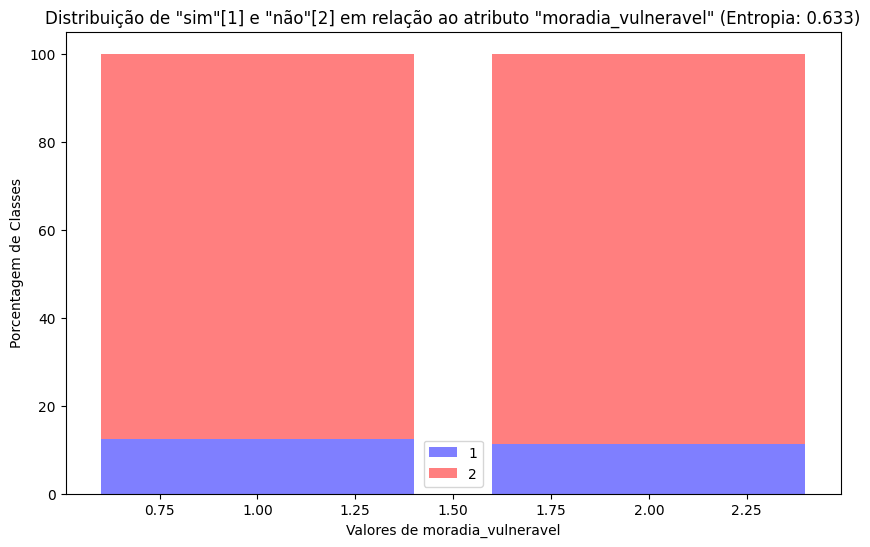

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


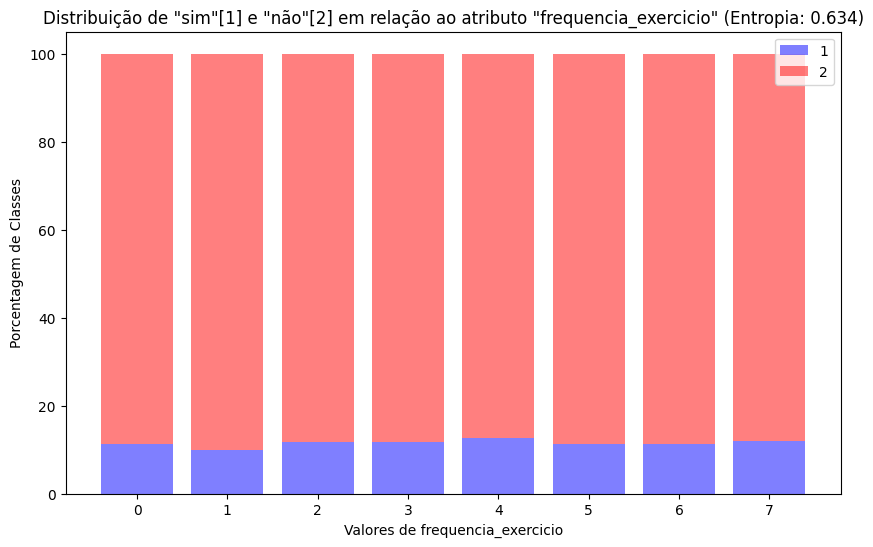

C:\Users\maype\AppData\Local\Temp\ipykernel_12632\2843737252.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()


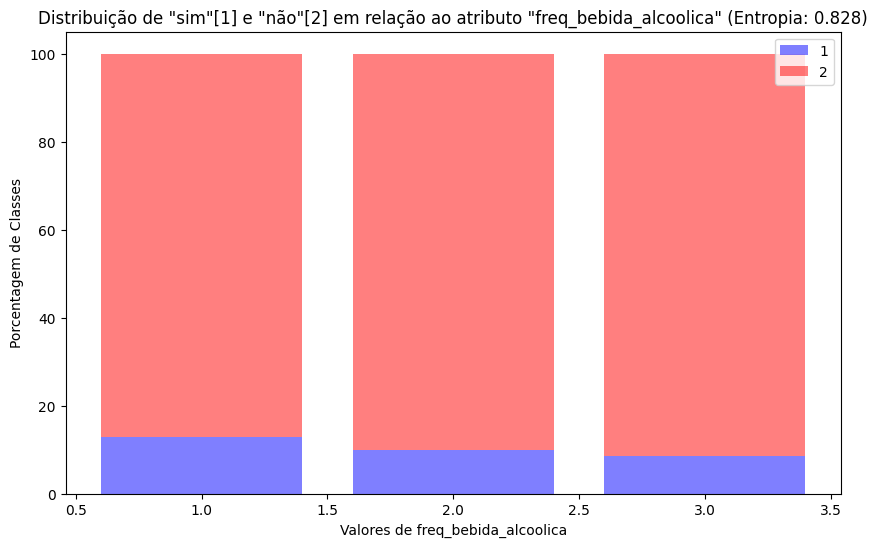

In [36]:
import matplotlib.pyplot as plt

# Dicionário contendo os atributos e suas entropias
atributos_entropia = {
    'Sexo': 0.9750464384429841,
    'Apoio_Familiar': 0.7006139387476383,
    'Apoio_de_Amigos': 0.8989030338612245,
    'Tipo_de_Trabalho': 0.7673842926810199,
    'Curso_Mais_Elevado': 0.6766079482553459,
    'A005010': 0.47542336561392207,
    'Estado_de_Saude': 0.6810669881755118,
    'Pratica_Exercicio': 0.9442823076470568,
    'Exercicio_Mais_Frequente': 0.45422552912663944,
    'Ultima_Consulta_Medica': 0.4419700673928943,
    'Procura_Atendimento_Saude': 0.7605022573374819,
    'Problemas_Sono': 0.7456827047971407,
    'Consumo_Arroz_Macarrao': 0.46086676246781916,
    'Consumo_Batata': 0.9722213830859208,
    'Consumo_Feijao': 0.7478641852002679,
    'Consumo_Carne': 0.4262684345340236,
    'Consumo_Ovo': 0.9745525811817346,
    'Consumo_Verduras_1': 0.9986050937284516,
    'Consumo_Verduras_2': 0.9659019704395119,
    'Consumo_Verduras_3': 0.9719580269432749,
    'Consumo_Frutas_1': 0.9248908549302097,
    'Consumo_Frutas_2': 0.9631847403846884,
    'Consumo_Leite': 0.9917028946870711,
    'Consumo_Castanhas': 0.5617128704366429,
    'Consumo_Refrigerante': 0.821282453448795,
    'Consumo_Suco_Caixinha': 0.7018284037619281,
    'Consumo_Bebida_Achocolatada': 0.488411039051566,
    'Consumo_Salgadinho_Biscoito': 0.7242853454188495,
    'Consumo_Biscoito_Doce': 0.6832990106211653,
    'Consumo_Sobremesa': 0.6026544097411339,
    'Consumo_Embutidos': 0.7637845144003688,
    'Consumo_Pao': 0.8424857431787504,
    'Consumo_Molhos_Industrializados': 0.9654913151164628,
    'Consumo_Alimentos_Prontos': 0.2631429150988227,
    'Freq_Consumo_Feijao': 0.7682189797912276,
    'Freq_Consumo_Verduras': 0.8567277569785502,
    'Tipo_Verdura_Costuma_Comer': 0.5484428447091109,
    'Freq_Consumo_Carne_Vermelha': 0.9431239174837084,
    'Freq_Consumo_Frango': 0.9000990503591189,
    'Freq_Consumo_Peixe': 0.7071173607639086,
    'Freq_Consumo_Suco_Caixinha': 0.541851600547697,
    'Freq_Consumo_Suco_Natural': 0.9147967601958307,
    'Freq_Consumo_Frutas': 0.9029519397437129,
    'Freq_Comer_Frutas_Dia': 0.6978073093475827,
    'Freq_Consumo_Refrigerante': 0.6093546199459223,
    'Freq_Consumo_Leite': 0.7790841855702733,
    'Tipo_Leite': 0.7548373715162308,
    'Freq_Consumo_Doces': 0.7165976248509345,
    'Freq_Substituicao_Refeicao': 0.31420651899893604,
    'trabalhou': 0.9691924645850839,
    'doencas_cronicas': 0.8843633005791384,
    'saneamento_basico': 0.11012768734778847,
    'moradia_vulneravel': 0.6331327621979549,
    'frequencia_exercicio': 0.6336491157763019,
    'freq_bebida_alcoolica': 0.8277786096047649,
}

# Iterar sobre os itens do dicionário e criar gráficos para cada atributo
for atributo, entropia in atributos_entropia.items():
    distribuicao = df.groupby([atributo, 'Diagnostico_Depressao']).size().unstack()

    total_por_valor = distribuicao.sum(axis=1)

    porcentagem_sim = (distribuicao[1] / total_por_valor) * 100
    porcentagem_nao = (distribuicao[2] / total_por_valor) * 100

    plt.figure(figsize=(10, 6))
    plt.bar(porcentagem_sim.index, porcentagem_sim, color='b', alpha=0.5, label=1)
    plt.bar(porcentagem_nao.index, porcentagem_nao, color='r', alpha=0.5, bottom=porcentagem_sim, label=2)
    plt.xlabel(atributo)
    plt.ylabel('Porcentagem (%)')
    plt.title('Distribuição de "sim"[1] e "não"[2] em relação ao atributo "{}" (Entropia: {:.3f})'.format(atributo, entropia))
    plt.legend()

    plt.xlabel('Valores de {}'.format(atributo))
    plt.ylabel('Porcentagem de Classes')

    plt.show()
